<a href="https://colab.research.google.com/github/juligomez-web/Sys/blob/main/Primer_Parcial_Julio_Cesar_Gomez_Copia_de_1_PARCIAL_SYS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARCIAL #1: SEÑALES Y SISTEMAS 2025_II**

JULIO CESAR GOMEZ

**1 La distancia media entre dos señales periódicas x1(t) ∈ ℝ,ℂ y x2(t) ∈ ℝ,ℂ; se puede expresar a partir de la potencia media de la diferencia entre ellas:**

d²(x1, x2) = P̄{x1−x2} = lim{T→∞} (1/T) ∫_T |x1(t) − x2(t)|² dt

Sea x1(t) y x2(t) dos señales definidas como:

x1(t) = A·e^(−j n ω0 t)

x2(t) = B·e^( j m ω0 t)

con ω0 = 2π/T; T, A, B ∈ ℝ⁺ y n, m ∈ ℤ.

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

**SOLUCIÓN**

Si la distancia media entre las 2 señales es:

$d^2(x_1,x_2)=\overline{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt$

Pero nosotros sabemos que:

$\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt=\overline{P}_e$

Y $\overline{P}_e$ se puede calcular también por:

$\overline{P}_e=\overline{P}_{x_1}-\frac{2}{T}∫_Tx_1(t)x_2^*(t)dt+\overline{P}_{x_2}$

Es posible calcular cada una por a parte asi:

In [1]:
import sympy as sym #importamos sympy para hacer integrales simbolicas
from IPython.display import display #importo display para mostrar resultados bonitos

T = sym.Symbol("T", real=True, positive=True) #real positivo
A = sym.Symbol("A", real=True, positive=True) #real positivo
n = sym.Symbol("n", integer=True) #entero
t = sym.Symbol("t")
omega = 2*sym.pi/T #creamos las variables simbolicas T,A,n,t y definimos nuestra fecuencia angular omega

x1 = A*sym.exp(-sym.I * n * omega * t)
x1_conj = sym.conjugate(x1)

display(x1 , x1_conj)

A*exp(-2*I*pi*n*t/T)

A*exp(2*I*pi*n*conjugate(t)/T)

In [2]:
px1 = (1/T) * sym.integrate(x1*x1_conj,(t, -T/2, T/2)) #hacemos la integral simbolica

display(px1) #que nos muestre el resultado

A**2

In [7]:
#Fue un éxito, ahora hagamos lo propio con x2
B = sym.Symbol("B", real=True, positive=True) #real positivo
m = sym.Symbol("m", integer=True) #entero

x2 = B*sym.exp(-sym.I * m * omega * t)
x2_conj = sym.conjugate(x2)

In [5]:
px2 = (1/T) * sym.integrate(x2*x2_conj,(t, -T/2, T/2)) #hacemos la integral simbolica

display(px2) #que nos muestre el resultado

B**2

Listas las integrales sencillas, ahora vamos a intentar con la integral que tiene 2 casos posibles:

In [ ]:
integ = -(2/T)*sym.integrate(x1*x2_conj,(t, -T/2, T/2)) #integral simbolica

display(integ) #a ver

-2*Piecewise((A*B*T, Eq(m, n) | (Eq(m, 0) & Eq(m, n)) | (Eq(m, 0) & Eq(n, 0)) | (Eq(m, n) & Eq(n, 0)) | (Eq(m, 0) & Eq(m, n) & Eq(n, 0))), (-I*A*B*T*exp(I*pi*m)/(2*pi*m*exp(I*pi*n) - 2*pi*n*exp(I*pi*n)) + I*A*B*T*exp(-I*pi*m)/(2*pi*m*exp(-I*pi*n) - 2*pi*n*exp(-I*pi*n)), True))/T

Resulta sencillo notar que en últimas:

# Caso 1:
$n = -m$ o $n=0$ y $m=0$

$-\frac{2ABT}{T}=-2AB$

# Caso 2:
$n \neq -m$, $n \neq 0$ y $m \neq 0$

$-\frac{2(-\frac{iABTe^{iπm}}{2πme^{iπn}-2πne^{iπn}}+\frac{iABTe^{-iπm}}{2πme^{-iπn}-2πne^{-iπn}})}{T}=0$

Como el problema nos dice que

$d^2(x_1,x_2)=\overline{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt=\overline{P}_e$

Luego

$d(x_1,x_2)=\sqrt{\overline{P}_e}$

Es decir que si $n = -m$ o $n=0$ y $m=0$

$d(x_1,x_2)=\sqrt{\overline{P}_e}=\sqrt{A^2+B^2-2AB}$

Y si $n \neq -m$, $n \neq 0$ y $m \neq 0$

$d(x_1,x_2)=\sqrt{\overline{P}_e}=\sqrt{A^2+B^2}$


**2.Encuentre la señal en tiempo discreto al utilizar un conversor
 análogo digital con frecuencia de muestreo de 5kHz y 4 bits
 de capacidad de representación, aplicado a la señal continua:**

 x(t) = 3cos (1000πt) + 5sin (3000πt) + 10cos (11000πt)

Realizar la simulación del proceso de discretización (inclu
yendo al menos tres periodos de x(t)). En caso de que la dis
cretización no sea apropiada, diseñe e implemente un con
versor adecuado para la señal estudiada.

**SOLUCIÓN**

Para empezar calculamos el periodo de la señal $x(t)$, el cual es el minimo común multiplo de los periodos de las otras señales:

$m.c.m(\frac{1}{500},\frac{1}{1500},\frac{1}{5500})=\frac{1}{M.c.d(500,1500,5500)}=\frac{1}{500}$

Con lo que la frecuencia de la señal es $500 Hz$

Text(0, 0.5, '$x(t)$')

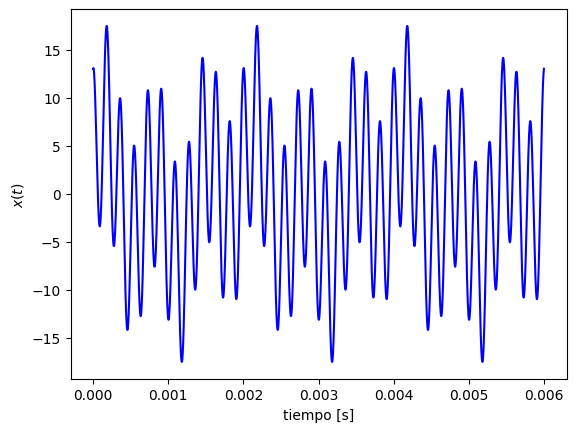

In [6]:
import numpy as np #importamos numpy para simular señales discretas
import matplotlib.pyplot as plt #librería para gráficas básicas en python

tin=0 #tiempo inicial
f=500 # frecuencia de la señal
T=1/f #periodo de la señal
tfin=T*3 #tiempo final, usamos tres veces el periodo obtenido ya que queremos ver 3 ciclos
fcont=f*5000 #vamos a simular como luce en tiempo continuo la señal para hacer la comparación
tcont=1/fcont
tveccont = np.arange(tin, tfin+tcont, tcont) #ponemos tiempo final más t muestreo para que si tome los 3 ciclos, ya que si no el ultimo queda incompleto
xcont= 3*np.cos(1000*np.pi*tveccont) + 5*np.sin(3000*np.pi*tveccont) + 10*np.cos(11000*np.pi*tveccont) #nuestra señal en continuo
plt.plot(tveccont,xcont,"b-",label="señal pedida") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

Ahora vamos a ver como luce la señal discretizada con la condicion dada de $F_s=5000Hz$:

Text(0, 0.5, '$x(t)$')

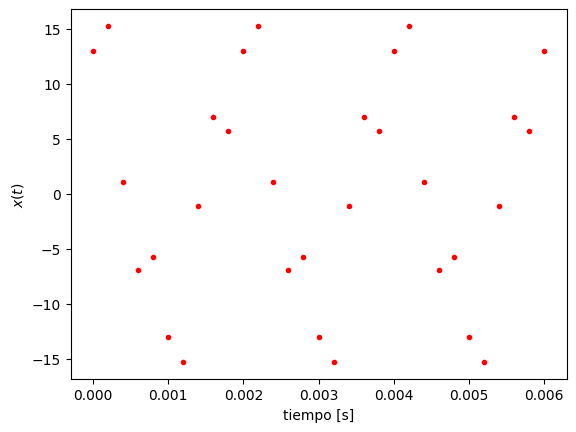

In [ ]:
Fs=5000
Ts=1/5000
tvecdis1 = np.arange(tin, tfin+Ts, Ts)
xdis1 = 3*np.cos(1000*np.pi*tvecdis1) + 5*np.sin(3000*np.pi*tvecdis1) + 10*np.cos(11000*np.pi*tvecdis1) #nuestra señal en discreto con la frecuencia de muestreo que nos dieron
plt.plot(tvecdis1,xdis1,"r.",label="señal discretizada con Fs=5000Hz") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

**CONVERSOR** Aqui se nota que como la frecuencia de muestreo que nos dieron no cumple el Teorema de Nyquist, lo que alcanza a ver nuestro conversor de la señal es muy minimo, y es insuficiente para reconstruir la señal.

Text(0, 0.5, '$x_{cs}(t)$')

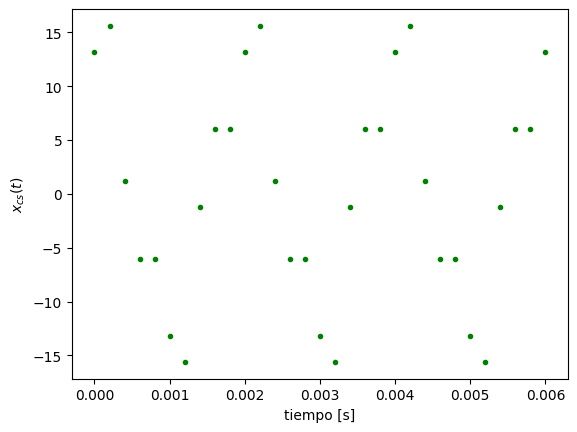

In [ ]:
#muy bien, ahora digitalizamos la señal
from scipy.spatial.distance import cdist #esto se copio y se pego de uno de los cuadernos facilitados por el profesor, usaremos las funciones definidas por él para nuestra solución

vcuant=np.linspace(-18,18,2**4) #creamos un vector que define que valores puede tomar nuestra función en el eje y, el número de muestras viene dado por 2**nbits, en nuestro problema, 4 bits
#función cuantización punto a punto

#esta función se copio y se pego como venia de un cuaderno facilitado por el profe
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]
for i in range(xdis1.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq = my_cuantizador(xdis1[i],vcuant)
   else:
     senalq = np.append(senalq,my_cuantizador(xdis1[i],vcuant))

plt.plot(tvecdis1,senalq,"g.",label="señal digitalizada con Fs=5500Hz y 4 bits") #a ver como quedo x3
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

Ahora vamos a proponer una solución mejor al problema: necesitamos una mayor frecuencia de muestreo que por lo menos cumpla Nyquist, es decir:

$F_s \geq 2Fmax$

Como la $Fmax$ de la señal es $5500Hz$, para que la señal digitalizada luzca bien proponemos un $Fs=200*Fmax$

Text(0, 0.5, '$x(t)$')

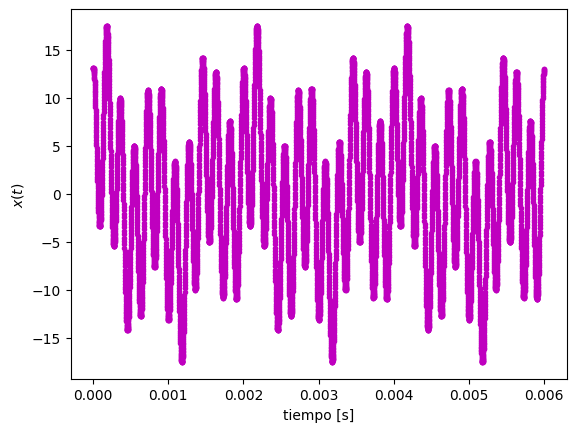

In [ ]:
Fmax = 5500
Fs2 = 200*Fmax
Ts2 = 1/Fs2
tvecdis2 = np.arange(tin, tfin+Ts2, Ts2)
xdis2 = 3*np.cos(1000*np.pi*tvecdis2) + 5*np.sin(3000*np.pi*tvecdis2) + 10*np.cos(11000*np.pi*tvecdis2) #nuestra señal en discreto con la frecuencia de muestreo que proponemos
plt.plot(tvecdis2,xdis2,"m.",label="señal discretizada con Fs=200*Fmax") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

Como vemos, con esta nueva frecuencia de muestreo podemos ver la señal por completo, ahora si la cuantizamos nos queda:

Text(0, 0.5, '$x_{cs}(t)$')

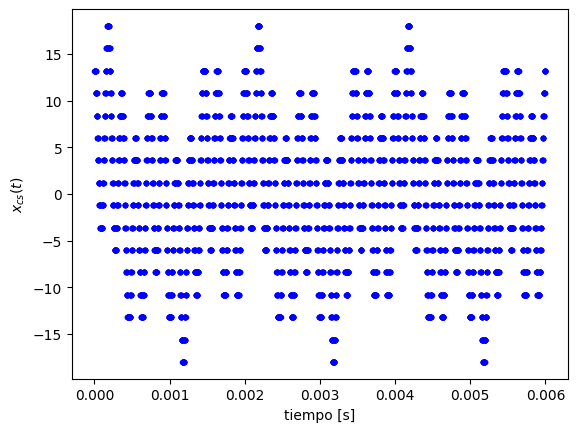

In [ ]:
for i in range(xdis2.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq2 = my_cuantizador(xdis2[i],vcuant)
   else:
     senalq2 = np.append(senalq2,my_cuantizador(xdis2[i],vcuant))

plt.plot(tvecdis2,senalq2,"b.",label="señal digitalizada con Fs=200*Fmax y 4 bits") #a ver como quedo x1000
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

Al ver la señal digitalizada no es posible visualizar como era originalmente, para hacerla más fiel a la original seria necesario utilizar más bits, con un incremento de tan solo 1 bit se obtendria:

Text(0, 0.5, '$x_{cs}(t)$')

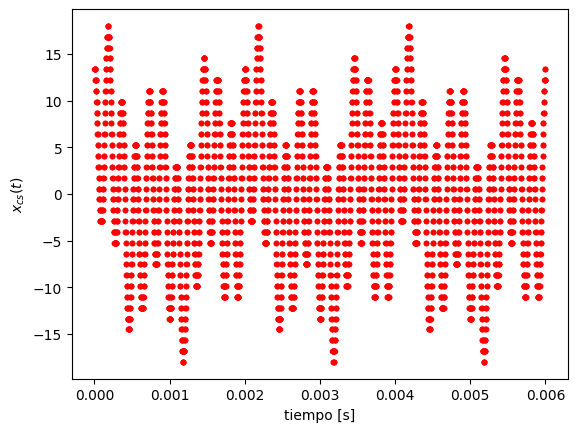

In [ ]:
vcuant2=np.linspace(-18,18,2**5) #creamos un vector que define que valores puede tomar nuestra función en el eje y, el número de muestras viene dado por 2**nbits, en nuestra solución, 5 bits
for i in range(xdis2.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq3 = my_cuantizador(xdis2[i],vcuant2)
   else:
     senalq3 = np.append(senalq3,my_cuantizador(xdis2[i],vcuant2))

plt.plot(tvecdis2,senalq3,"r.",label="señal digitalizada con Fs=200*Fmax y 5 bits") #a ver como quedo x10000
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

**3  Sea x(t) la segunda derivada de la señal x(t), donde t ∈
 [ti, tf]. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:**

 $$cn=\frac{1}{(t_i-t_f)n^2 \omega_0 ^2}\int_{t_i}^{t_f}x''(t)e^{-j n \omega_0 t}dt n ∈ Z$$

¿Cómo se pueden calcular los coeficientes an y bn desde
 x"(t) en la serie trigonométrica de Fourier?

**SOLUCIÓN PDF ADJUNTO CORREO**

*   Elemento de lista
*   Elemento de lista



**4** Encuentre el espectro de Fourier, su parte real,
 imaginaria, magnitud, fase y el error relativo para
 n∈{0,±1,±2,±3,±4,±5}, a partir de x(t) para la
 señal x(t) en la Figura 1 . Compruebe el espectro obtenido
 con la estimación a partir de x"(t). Presente las simulaciones
 de Python respectivas.

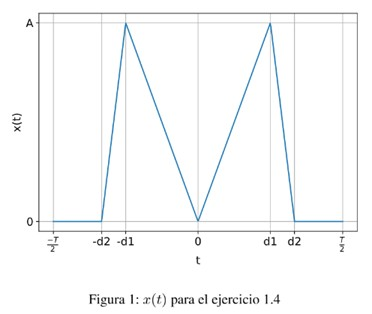

**4** Encuentre el espectro de Fourier, su parte real,
imaginaria, magnitud, fase y el error relativo para  
$(n\in\{0,\pm1,\pm2,\pm3,\pm4,\pm5\}$), a partir de $(x''(t)$) para la
señal $(x(t)$) de la Figura 1. Compruebe el espectro obtenido
con la estimación a partir de $(x(t)$). Presente las simulaciones
de Python respectivas.

**Solución**

La función se definió a trozos así:

\[
x(t) =
\begin{cases}
0, & -\dfrac{T}{2} \le t \le -d_2 \\[4pt]
\dfrac{A}{d_2-d_1} t + \dfrac{A d_2}{d_2-d_1}, & -d_2 \le t \le -d_1 \\[4pt]
-\dfrac{A}{d_1} t, & -d_1 \le t \le 0 \\[4pt]
\dfrac{A}{d_1} t, & 0 \le t \le d_1 \\[4pt]
\dfrac{A}{d_1-d_2} t + \dfrac{A d_2}{d_2-d_1}, & d_1 \le t \le d_2 \\[4pt]
0, & d_2 \le t \le \dfrac{T}{2}
\end{cases}
\]

Lo cual en un periodo se ve así:


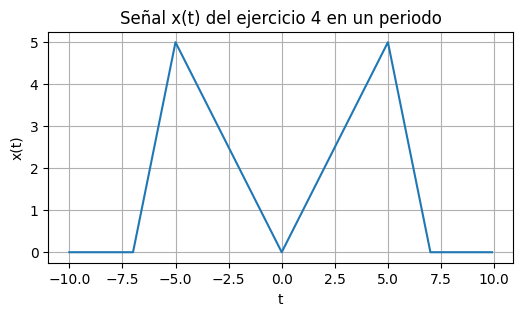

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal (según el parcial)
T  = 20          # periodo de la señal
A  = 5           # altura de la señal
d2 = 7           # d2 < T/2
d1 = 5           # d1 < d2

# Muestreo en tiempo
Fmu = 200 * (1/T)      # frecuencia de muestreo
Tmu = 1 / Fmu          # periodo de muestreo
vect = np.arange(-T/2, T/2, Tmu)   # vector de tiempo en un periodo

# Construimos x(t) por tramos
vecx = np.zeros(len(vect))

# -d2 <= t < -d1  :  x(t) = (A/(d2-d1)) t + A d2/(d2-d1)
mask1 = (vect >= -d2) & (vect < -d1)
vecx[mask1] = (A/(d2-d1)) * vect[mask1] + (A*d2)/(d2-d1)

# -d1 <= t < 0    :  x(t) = -A t / d1
mask2 = (vect >= -d1) & (vect < 0)
vecx[mask2] = -(A/d1) * vect[mask2]

# 0 <= t < d1     :  x(t) = A t / d1
mask3 = (vect >= 0) & (vect < d1)
vecx[mask3] = (A/d1) * vect[mask3]

# d1 <= t < d2    :  x(t) = A/(d1-d2) t + A d2/(d2-d1)
mask4 = (vect >= d1) & (vect < d2)
vecx[mask4] = (A/(d1-d2)) * vect[mask4] + (A*d2)/(d2-d1)

# Gráfica de x(t)
plt.figure(figsize=(6,3))
plt.plot(vect, vecx)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.title('Señal x(t) del ejercicio 4 en un periodo')
plt.show()


Ahora que hemos pintado cómo luce nuestra señal, vamos a crear
las bases de Fourier conforme a lo solicitado, para $(n=-5,\dots,5$).


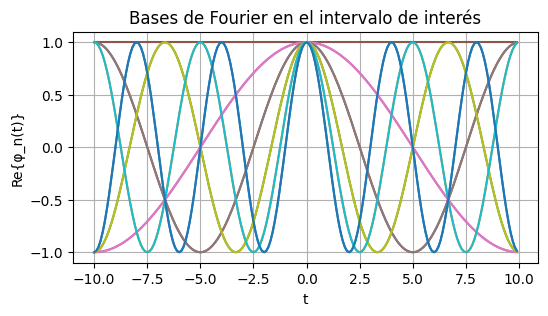

In [19]:
# Número de armónicos
N  = 5                 # n = -5,...,5
wo = 2 * np.pi / T     # frecuencia fundamental

# Definir bases de Fourier
Nm   = len(vect)
phin = np.zeros((Nm, 2*N + 1), dtype=np.complex128)

for n in range(-N, N+1):
    phin[:, n+N] = np.exp(1j * n * wo * vect)   # base en el intervalo de interés

# (Opcional) ver cómo se ven algunas bases en el tiempo
plt.figure(figsize=(6,3))
plt.plot(vect, np.real(phin))   # parte real de las bases
plt.xlabel('t')
plt.ylabel('Re{φ_n(t)}')
plt.grid(True)
plt.title('Bases de Fourier en el intervalo de interés')
plt.show()


El espectro de Fourier $(C_n$) se puede obtener a partir de $(x''(t)$)
usando el resultado del punto 3. En este ejercicio:

- Calculamos primero $(C_n$) **directamente desde \(x(t)\)** por la definición:
  $[
  C_n^{(x)} = \frac{1}{T}\int_{-T/2}^{T/2} x(t)e^{-j n\omega_0 t}\,dt.
  $]

- Luego calculamos $(C_n$) **a partir de \(x''(t)\)**:
  $[
  C_n^{(x'')} =
  \frac{1}{(t_i-t_f)\,n^2\omega_0^2}
  \int_{t_i}^{t_f} x''(t)e^{-j n\omega_0 t}\,dt,\quad n\neq 0,
  $]
  con $(t_i=-T/2$), $(t_f=T/2$) y para $(n=0$) usamos
  $[
  C_0 = \frac{1}{T}\int_{-T/2}^{T/2} x(t)\,dt.
  $]

- Finalmente comparamos ambos espectros y calculamos el **error relativo**.


/tmp/ipython-input-1991300896.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Cn_x[k] = (1/T) * np.trapz(vecx * expon, vect)
/tmp/ipython-input-1991300896.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(d2x_dt2 * expon, vect)
/tmp/ipython-input-1991300896.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Cn[k] = (1/T) * np.trapz(vecx, vect)


Errores relativos coeficiente a coeficiente:
n = -5  ->  error_rel = 8.198e-03
n = -4  ->  error_rel = 5.253e-03
n = -3  ->  error_rel = 2.957e-03
n = -2  ->  error_rel = 1.315e-03
n = -1  ->  error_rel = 3.289e-04
n =  0  ->  error_rel = 0.000e+00
n =  1  ->  error_rel = 3.289e-04
n =  2  ->  error_rel = 1.315e-03
n =  3  ->  error_rel = 2.957e-03
n =  4  ->  error_rel = 5.253e-03
n =  5  ->  error_rel = 8.198e-03


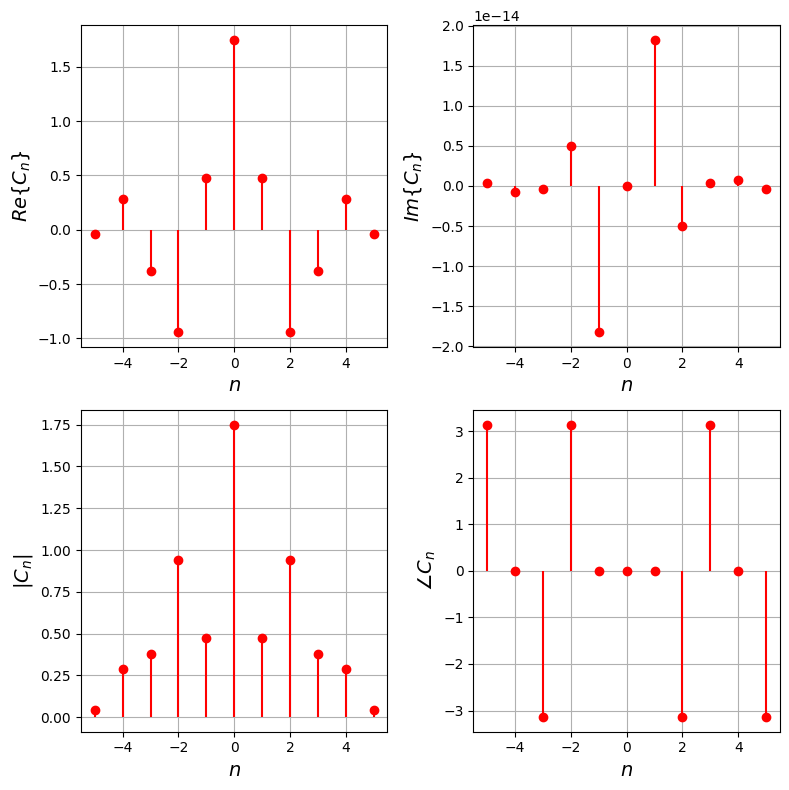

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


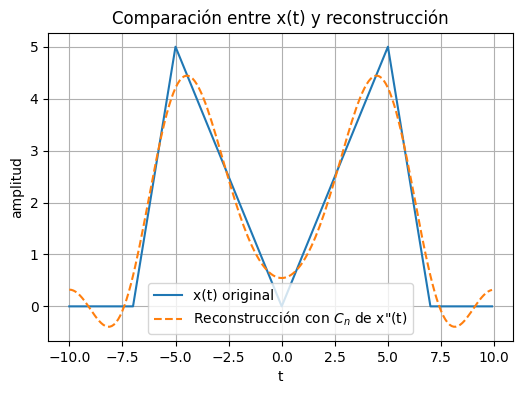

Error relativo en el tiempo (reconstrucción): 0.11684109507786464


In [21]:
# ===== Espectro directo desde x(t) =====
nv = np.arange(-N, N+1)                 # n = -5,...,5
Cn_x = np.zeros_like(nv, dtype=complex)

for k, nk in enumerate(nv):
    expon = np.exp(-1j * nk * wo * vect)
    Cn_x[k] = (1/T) * np.trapz(vecx * expon, vect)

# ===== Segunda derivada numérica x''(t) =====
dx_dt   = np.gradient(vecx, vect)
d2x_dt2 = np.gradient(dx_dt, vect)

# ===== Espectro a partir de x''(t) =====
Cn = np.zeros_like(nv, dtype=complex)
ti, tf = -T/2, T/2

for k, nk in enumerate(nv):
    if nk == 0:
        # C_0: valor medio de la señal (aquí corregimos el error de antes)
        Cn[k] = (1/T) * np.trapz(vecx, vect)
    else:
        expon = np.exp(-1j * nk * wo * vect)
        integral = np.trapz(d2x_dt2 * expon, vect)
        # Fórmula del punto 3 (ti - tf = -T)
        Cn[k] = (1.0 / ((ti - tf) * (nk**2) * (wo**2))) * integral

# ===== Error relativo coeficiente a coeficiente =====
eps = 1e-12
error_rel = np.abs(Cn - Cn_x) / np.maximum(np.abs(Cn_x), eps)

print("Errores relativos coeficiente a coeficiente:")
for nk, e in zip(nv, error_rel):
    print(f"n = {nk:2d}  ->  error_rel = {e:.3e}")

# ===== Gráficas del espectro obtenido desde x''(t) =====
fig = plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r', basefmt=" ")
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid(True)

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r', basefmt=" ")
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid(True)

plt.subplot(2,2,3)
plt.stem(nv, np.abs(Cn), 'r', basefmt=" ")
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.axis('tight')
plt.grid(True)

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r', basefmt=" ")
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\angle C_n$', fontsize=14)
plt.axis('tight')
plt.grid(True)

fig.tight_layout()
plt.show()

# ===== Reconstrucción de la señal con Cn (desde x''(t)) =====
xe = phin.dot(Cn)   # producto entre bases y coeficientes

plt.figure(figsize=(6,4))
plt.plot(vect, vecx, label='x(t) original')
plt.plot(vect, xe, '--', label='Reconstrucción con $C_n$ de x\"(t)')
plt.xlabel('t')
plt.ylabel('amplitud')
plt.grid(True)
plt.legend()
plt.title('Comparación entre x(t) y reconstrucción')
plt.show()

# Error relativo en el dominio del tiempo (margen de error de la reconstrucción)
err_time = np.linalg.norm(vecx - xe) / np.linalg.norm(vecx)
print("Error relativo en el tiempo (reconstrucción):", err_time)
